### Part 1 : Uniform samples from a circular region
Throughout the notebook:
* *n* denotes number of samples to generate.
* *m* denotes the dimension of target space.
* *r* denotes length of a vector.

In this part we generate samples using inversion method. We derive cumulative distribution function by integrating the the probability density function then inverting it.

$$F(x) = \int_{-\infty}^{\infty} f(x)$$ 

In this particular example for first distribution $p(r)$ we have:
$$f(x) = \begin{cases} 2r, & 0 \leq x \leq 1 \\ 0, & Otherwise \end{cases}$$

$$F(x) = \begin{cases} x^2, &  0 \leq x \leq 1\\ 0, & Otherwise \end{cases}$$

$$F^{-1}(x) = \begin{cases} \sqrt{x}, &  0 \leq x \leq 1\\ 0, & Otherwise \end{cases}$$

The same operation on the second distribution $U(\theta,0,2\pi)$:

$$f(x) = \begin{cases} \frac{1}{2\pi} , & 0 \leq x \leq 2\pi \\ 0, & Otherwise \end{cases}$$

$$F(x) = \begin{cases} \frac{x}{2\pi}, &  0 \leq x \leq 2\pi\\ 0, & Otherwise \end{cases}$$

$$F^{-1}(x) = \begin{cases} 2\pi x, &  0 \leq x \leq 1\\ 0, & Otherwise \end{cases}$$

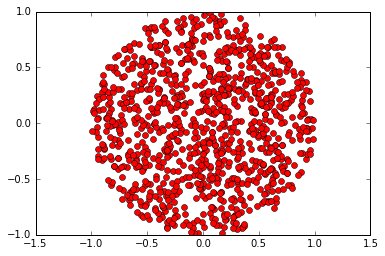

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n = 1000 # number of samples

u_r = np.random.rand(n,1) # uniform(0,1)
u_theta = np.random.rand(n,1) # uniform(0,1)

r = u_r**0.5 # invert
theta = u_theta * 2 * np.pi # invert

x = r * np.cos(theta) # convert to cartesian for plotting
y = r * np.sin(theta)

plt.plot(x,y,'ro') # plot
plt.axis('equal')
plt.show()

### Part 2 : Uniform samples from p-unitball regions

In this part we apply rejection sampling. We generate uniform samples in a square region that is $|x| \leq 1$ and $|y| \leq 1$, then we accept samples that oracle function returns true for.


(-1.0, 1.0, -1.0, 1.0)

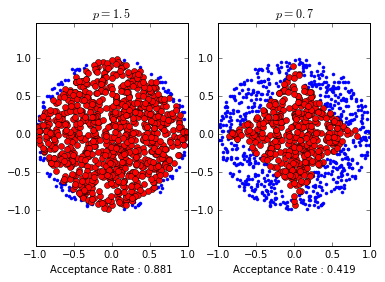

In [3]:
# outputs true if a particular 2-d vector is located on or inside the unitball of p-norm
def oracle_2d_unitball(norm,x,y):
    calculated = (abs(x)**norm + abs(y)**norm)**(1/norm)
    return calculated <= 1

candidate_x = x
candidate_y = y

one_half = oracle_2d_unitball(1.5,candidate_x,candidate_y) # ask to oracle for p=1.5
point_seven = oracle_2d_unitball(0.7,candidate_x,candidate_y) # ask to oracle for p=0.7

good_one_half = np.nonzero(one_half)[0] # accepted indices
good_point_seven = np.nonzero(point_seven)[0] # accepted indices

x_one_half = candidate_x[good_one_half] # accepted Xs for p=1.5
y_one_half = candidate_y[good_one_half] # accepted Ys for p=1.5
acceptance_rate_one_half = len(good_one_half)/float(n) # acceptance rate

x_point_seven = candidate_x[good_point_seven] # accepted Xs for p=0.7
y_point_seven = candidate_y[good_point_seven] # accepted Ys for p=0.7
acceptance_rate_point_seven = len(good_point_seven)/float(n) # acceptance rate

plt.figure()

plt.subplot(121)
plt.title('$p = 1.5$')
plt.xlabel('Acceptance Rate : '+str(acceptance_rate_one_half))
plt.plot(candidate_x,candidate_y,'b.')
plt.plot(x_one_half,y_one_half,'ro')
plt.axis('equal')

plt.subplot(122)
plt.title('$p = 0.7$')
plt.xlabel('Acceptance Rate : '+str(acceptance_rate_point_seven))
plt.plot(candidate_x,candidate_y,'b.')
plt.plot(x_point_seven,y_point_seven,'ro')

plt.axis('equal')

We always can increase our acceptance rate by proposing a tighter dominating region. For this purpose, when $p \leq 1$ we can make use of a diamond shaped region (same as unitball of 1-norm). We can map our square region ($|x| \leq 1$ and $|y| \leq 1$) to this diamond region with basic operations as follows:

$$Rot_\theta(x,y)=(x',y')$$

$$r = \sqrt{x^2 + y^2}$$

$$x' = r \cos(\tan^{-1}(\frac{y}{x}) + \theta)$$

$$y' = r \sin(\tan^{-1}(\frac{y}{x}) + \theta)$$


(-1.0, 1.0, -1.0, 1.0)

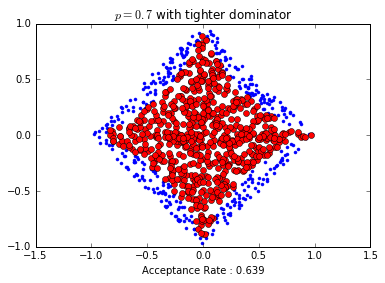

In [4]:
theta = np.pi / 4 # We rotate +45 degrees

# edges of the diamond are length of square root of 2 
temp_x = np.random.rand(n,1)*(2**0.5) 
temp_y = np.random.rand(n,1)*(2**0.5)
r = (temp_x**2+temp_y**2)**0.5 # calculate r

# rotate samples
candidate_x = r * np.cos(np.arctan(temp_y/temp_x) + theta) 
candidate_y = r * np.sin(np.arctan(temp_y/temp_x) + theta) - (1) # down shift y so that center is on (0,0)

point_seven = oracle_2d_unitball(0.7,candidate_x,candidate_y) # true false vector
good_point_seven = np.nonzero(point_seven)[0] # true indices

x_point_seven = candidate_x[good_point_seven] # get x values
y_point_seven = candidate_y[good_point_seven] # get y values
acceptance_rate_point_seven = len(good_point_seven)/float(n)

plt.figure()
plt.title('$p = 0.7$ with tighter dominator')
plt.xlabel('Acceptance Rate : '+str(acceptance_rate_point_seven))
plt.plot(candidate_x,candidate_y,'b.')
plt.plot(x_point_seven,y_point_seven,'ro')
plt.axis('equal')

### Bonus Part : Uniform samples from an n-Sphere

In this part we apply the same procedure from Part 1 to generate samples from an n-sphere region. [See](http://www.wikiwand.com/en/N-sphere#/Spherical_coordinates) how spherical coordinates are converted to cartesian coordinates. By intuition, since the volume grows faster when dimension ($m$) is larger, the probability to generate a sample on outer shells of the sphere must be higher in the same proportion. Therefore we use the following equation to generate length of the samples.

$$F^{-1}(x) = \begin{cases} \sqrt[m]{x}, &  0 \leq x \leq 1\\ 0, & Otherwise \end{cases}$$

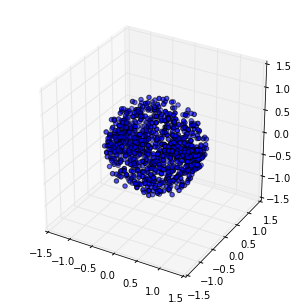

In [5]:
# given a list of angles, this function returns multiplication of sines of those angles
def sine_chain(list):
    rv = 1
    for angle in list:
        rv = rv * np.sin(angle)
    return rv

# given a list of angles (directions) and a length, returns the equivalent cartesian coordinate
# for calculation details see the (wiki) link above 
def to_cartesian(direction_list,r):
    dim = len(direction_list) + 1
    x = np.zeros(dim)
    for i in range(0,dim-1):
        x[i] = sine_chain(direction_list[0:i])*np.cos(direction_list[i])
    x[-1] = sine_chain(direction_list) 
    x = x * r
    return x


# recall n is the number of samples
m = 3 # m is dimension
rs = np.random.rand(n)**(1.0/m) # generate lengths of samples
directions = np.zeros([n,m-1]) 

for i in range(0,m-2):
    directions[:,i] = np.random.rand(n) * np.pi # generate directions between [0,pi]
directions[:,-1] = np.random.rand(n) * np.pi * 2 # generate last direction between [0,2pi], see the link for details

xs = np.zeros([n,m])
for i in range(0,n):
    selectedDirs = directions[i,:]
    selectedR = rs[i]
    producedX = to_cartesian(selectedDirs,selectedR) # convert to cartesian
    xs[i,:] = producedX

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs[:,0],xs[:,1],xs[:,2])
ax.set_aspect('equal')

If we are to use rejection sampling we would have a poor performance because when dimension ($m$) grows percentage of the rejection space (vector is in unit cube but outside unit ball) grows as well. Because volume of unit cube minus volume of a unit ball, contains the factor $r^m$.

$$((2r)^m) - (C(m) r^m) = (2^m-C(m)) r^m $$

$$2^m - C(m) \mbox{ is never 0.}$$ 

#### Sample from an n-sphere with rejection sampling

(0, 1.1)

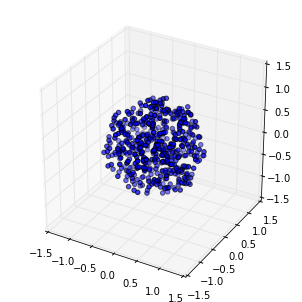

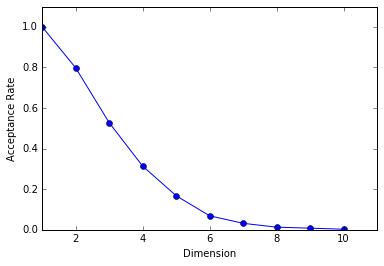

In [6]:
n = 1000 # number of samples
h_dim = 10
dimensions = range(1,h_dim+1)
acceptance_rates = np.zeros(h_dim)
for m in dimensions:
    u_matrix = np.random.rand(n,m)*2-1 # m is dimension
    accepted = u_matrix[(u_matrix**2).sum(axis=1) <= 1] # get accepted samples
    acceptance_rates[m-1] = np.shape(accepted)[0] / float(n) # calculate acceptance rate
    # plot 3-sphere for demonstration
    if m == 3:
        fig = plt.figure()
        ax = Axes3D(fig)        
        ax.scatter(accepted[:,0],accepted[:,1],accepted[:,2])
        ax.set_aspect('equal')

# plot dimension VS acceptance rate
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensions,acceptance_rates,'b-o')
ax.set_xlabel('Dimension')
ax.set_ylabel('Acceptance Rate')
ax.set_xlim([1,m+1])
ax.set_ylim([0,1.1])
    

As expected, when dimension grows the rejection space grows faster than the acceptance space.

$$V_n(R) = \frac{\pi^{n/2}}{\Gamma(n/2 + 1)}R^n \mbox{ (Volume of an n-sphere, radius $R$)}$$

$$C_n(R) = 2^n R^n \mbox{ (Volume of an n-cube wrapping an n-sphere with radius $R$)}$$

$$\lim_{n \rightarrow \infty} \frac{V_n(R)}{C_n(R)} = 0$$